In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
def train_test_split_user(df, test_ratio):
    keys=data.groupby('user_id').count().reset_index()['user_id'].to_numpy()
    index=int(len(keys)*test_ratio)
    np.random.shuffle(keys)
    test=df[df['user_id'].isin(keys[0:index])]
    train=df[df['user_id'].isin(keys[index:])]
    return train, test
    
def create_X_y(df):
    X=df['clean_text'].to_numpy()
    y=df['race'].to_numpy()
    return X, y

In [20]:
labeled_users=pd.read_csv("./data/labeled_users.csv",lineterminator='\r')[['user_id','race']]
labeled_users['user_id']=labeled_users['user_id'].apply(lambda x: x[1:])
#for weighted sampling:
#white_users=labeled_users[labeled_users['race']==4]
#labeled_users=labeled_users[labeled_users['race']!=4]
#white_users=white_users.sample(frac=0.12)
#labeled_users = labeled_users.append(white_users, ignore_index=True)
cleaned_tweets=pd.read_excel("./data/cleaned_tweets.xlsx",engine='openpyxl')
cleaned_tweets['user_id']=pd.to_numeric(cleaned_tweets['user_id'], downcast="integer")
labeled_users['user_id']=pd.to_numeric(labeled_users['user_id'], downcast="integer")
data=pd.merge(cleaned_tweets, labeled_users, left_on='user_id', right_on='user_id')
data=data[['user_id','clean_text','race']]
data=data.dropna()
data=data[data['race']<5]
print(data.groupby('race').count())
drop, data= train_test_split_user(data, 0.5)
train_all, test =train_test_split_user(data, 0.1)

      user_id
race         
1.0       374
2.0       241
3.0       140
4.0      3184
5.0       153


Exception ignored in: <bound method ExcelFile.__del__ of <pandas.io.excel._base.ExcelFile object at 0x0000025183369240>>
Traceback (most recent call last):
  File "c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\pandas\io\excel\_base.py", line 950, in __del__
    try:
KeyboardInterrupt: 


      user_id  clean_text
race                     
1.0     27183       27183
2.0     16822       16822
3.0      9433        9433
4.0     27818       27818


In [7]:
i=1
epochs=5
score=0
while i <= epochs:
    vectorizer = TfidfVectorizer(min_df=4)
    train, val= train_test_split_user(train_all, 0.2)
    train_X, train_y=create_X_y(train)
    val_X, val_y=create_X_y(test)
    train_X = vectorizer.fit_transform(train_X).todense()
    val_X=vectorizer.transform(val_X)
    print(train_X.shape)
    clf = LogisticRegression(random_state=0).fit(train_X, train_y)
    train_score=clf.score(train_X, train_y)
    val_score=clf.score(val_X,val_y)
    print(str(i)+") train: "+str(train_score))
    print(str(i)+") val: "+str(val_score))
    if score<val_score:
        score=val_score
        best_vectorizer=vectorizer
        best_model=clf
    i+=1

(102610, 10397)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1) train: 0.8306500341097359
1) val: 0.8028149289265457
(100511, 10297)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2) train: 0.8174030703107122
2) val: 0.801484489881661
(101545, 10421)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


3) train: 0.8253385198680389
3) val: 0.8025348364960437
(101421, 10322)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4) train: 0.8155904595695171
4) val: 0.8003641201596526
(101226, 10364)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


5) train: 0.8279592199632505
5) val: 0.8021146978502905


test score: 0.8028149289265457
              precision    recall  f1-score   support

       Black       0.05      0.01      0.01      1201
    Hispanic       0.25      0.01      0.01      1057
       Asian       0.00      0.00      0.00       391
       White       0.81      0.98      0.89     11632

    accuracy                           0.80     14281
   macro avg       0.28      0.25      0.23     14281
weighted avg       0.69      0.80      0.73     14281



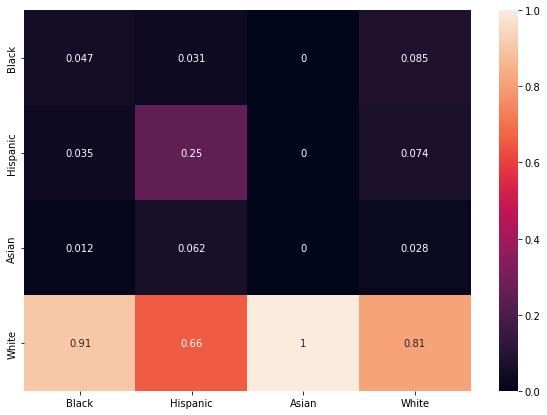

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt
class_names=["Black","Hispanic","Asian","White"]
test_X, test_y=create_X_y(test)
test_X=best_vectorizer.transform(test_X)
test_pred=best_model.predict(test_X)
cm = confusion_matrix(test_y, test_pred, normalize='pred')
df_cm = pd.DataFrame(cm, index = class_names,
                  columns = class_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
test_score=best_model.score(test_X,test_y)
print("test score: "+str(test_score))
print(classification_report(test_y, test_pred, target_names=class_names))

In [19]:
i=1
epochs=5
score=0
while i <= epochs:
    vectorizer = TfidfVectorizer(min_df=4)
    train, val= train_test_split_user(train_all, 0.2)
    train_X, train_y=create_X_y(train)
    val_X, val_y=create_X_y(test)
    train_X = vectorizer.fit_transform(train_X).todense()
    val_X=vectorizer.transform(val_X)
    print(train_X.shape)
    clf = LogisticRegression(random_state=0).fit(train_X, train_y)
    train_score=clf.score(train_X, train_y)
    val_score=clf.score(val_X,val_y)
    print(str(i)+") train: "+str(train_score))
    print(str(i)+") val: "+str(val_score))
    if score<val_score:
        score=val_score
        best_vectorizer=vectorizer
        best_model=clf
    i+=1

(29187, 6707)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1) train: 0.6305889608387296
1) val: 0.3286620835536753
(29042, 6544)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


2) train: 0.6265408718407823
2) val: 0.3262823902696986
(29667, 6767)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


3) train: 0.6280378872147504
3) val: 0.3233738762559492
(29210, 6698)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


4) train: 0.6233824032865457
4) val: 0.3157059756742464
(29201, 6622)


c:\users\zhuyl\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


5) train: 0.6300126707989453
5) val: 0.34056054997355895


test score: 0.3363299841353781
              precision    recall  f1-score   support

       Black       0.41      0.45      0.43      1363
    Hispanic       0.11      0.06      0.08       646
       Asian       0.36      0.03      0.05       770
       White       0.32      0.59      0.42      1003

    accuracy                           0.34      3782
   macro avg       0.30      0.28      0.24      3782
weighted avg       0.32      0.34      0.29      3782



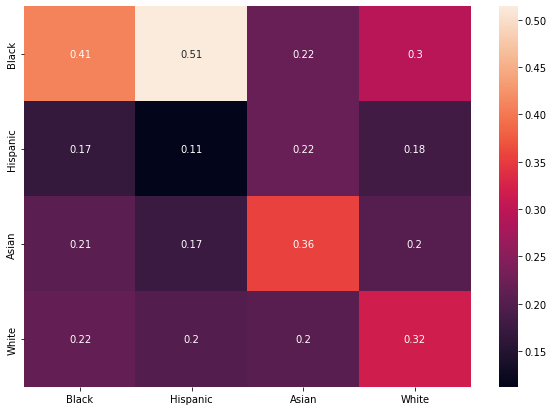

In [17]:
test_X, test_y=create_X_y(test)
test_X=best_vectorizer.transform(test_X)
test_pred=best_model.predict(test_X)
cm = confusion_matrix(test_y, test_pred, normalize='pred')
df_cm = pd.DataFrame(cm, index = class_names,
                  columns = class_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
test_score=best_model.score(test_X,test_y)
print("test score: "+str(test_score))
print(classification_report(test_y, test_pred, target_names=class_names))